In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
file_path = "/content/drive/MyDrive/Smith MMAI/MMAI 831/"
file_name ="emc.csv"

In [4]:
df = pd.read_csv(file_path + file_name)

In [5]:
df.shape
df.info()
df.describe().T
df.head(n=20)
df.tail()

(62141, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62141 entries, 0 to 62140
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Member       62141 non-null  object
 1   Order        62141 non-null  int64 
 2   SKU          62141 non-null  int64 
 3   Created On   62141 non-null  object
 4   Description  62141 non-null  object
dtypes: int64(2), object(3)
memory usage: 2.4+ MB


,count,mean,std,min,25%,50%,75%,max
Order,62141.0,7.642313e+06,5.131117e+05,6422558.0,7457967.0,7725501.0,8006749.0,8388492.0
SKU,62141.0,1.774323e+07,1.442477e+07,6884195.0,15668381.0,15668520.0,15669867.0,93319504.0


,Member,Order,SKU,Created On,Description
0,M09736,6468572,34993740,22-09-2014 22:45,Other Sauces
1,M09736,6468572,15669800,22-09-2014 22:45,Cashews
2,M09736,6468572,34989501,22-09-2014 22:45,Other Dals
3,M09736,6468572,7572303,22-09-2014 22:45,Namkeen
4,M09736,6468572,15669856,22-09-2014 22:45,Sugar
5,M09736,6468572,15668478,22-09-2014 22:45,Banana
6,M09736,6468572,21409124,22-09-2014 22:45,Sugar Cubes
7,M09736,6468572,34938526,22-09-2014 22:45,Other Sweets
8,M09736,6468572,15669778,22-09-2014 22:45,Other Dals
9,M09736,6468572,34989440,22-09-2014 22:45,Other Rice Products


,Member,Order,SKU,Created On,Description
62136,M64379,8381435,15670260,16-11-2013 00:43,Organic F&V
62137,M64379,8381435,15668597,16-11-2013 00:43,Exotic Vegetables
62138,M64379,8381435,7570555,16-11-2013 00:43,Shoe Polish
62139,M64379,8381435,7587490,16-11-2013 00:43,Organic Dals & Pulses
62140,M64379,8381435,15669830,16-11-2013 00:43,Other Rice Products


In [6]:
df['Created On'] = pd.to_datetime(df['Created On']).dt.date
#group by member 
my_mode = lambda x:pd.Series.mode(x)[0]
member =df.groupby('Member').agg(
    {
        'Order':[pd.Series.nunique, my_mode],
        'SKU' : [pd.Series.nunique, 'count'],
        'Created On':['count', my_mode, 'min', 'max'],
    }).reset_index()

member.columns = ["_".join(x) for x in member.columns.ravel()]
member = member.rename(columns={'Member': "Member"})
member.columns = member.columns.str.replace("<lambda_0>", "mode")
member.columns = member.columns.str.replace("<lambda>", "mode")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  # This is added back by InteractiveShellApp.init_path()


In [7]:
member_clean = member.drop(['Member_', 'Created On_mode', 'Created On_min', 'Created On_max', 'Order_mode', 'Created On_count'], axis=1)
member_pred =  member.drop(['Created On_mode', 'Created On_min', 'Created On_max', 'Order_mode', 'Created On_count'], axis=1)

In [ ]:
# K-means - Inertia as the number of clusters varies
from sklearn.cluster import KMeans

n_clusters = 10
n_init = 10
max_iter = 300
tol = 0.0001
random_state = 42

kMeans_inertia = pd.DataFrame(data=[],index=range(2,21), \
                              columns=['inertia'])
for n_clusters in range(2,21):
    kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, \
                max_iter=max_iter, tol=tol, random_state=random_state)

    cutoff = 99
    kmeans.fit(X_train_PCA.loc[:,0:cutoff])
    kMeans_inertia.loc[n_clusters] = kmeans.inertia_

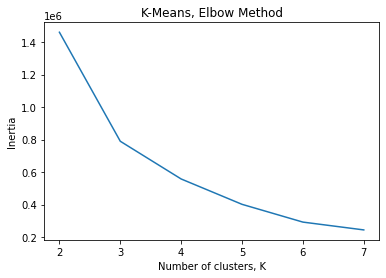

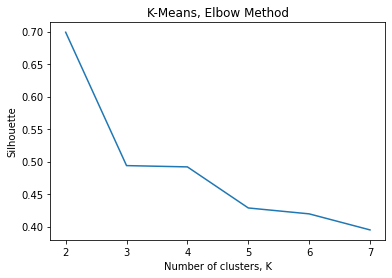

In [12]:
# K-means - Inertia as the number of clusters varies
from sklearn.cluster import KMeans

inertias = {}
silhouettes = {}
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(member_clean)
    inertias[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    silhouettes[k] = silhouette_score(member_clean, kmeans.labels_, metric='euclidean')
    

plt.figure();
plt.plot(list(inertias.keys()), list(inertias.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Inertia");


plt.figure();
plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Silhouette");

In [14]:
#Bayesian GMM
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(member_clean)
np.round(bgm.weights_, 2)

BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

array([0.88, 0.06, 0.02, 0.03, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [19]:
# DBSCAN
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
min_esp=9
max_esp = 50

for esp in range(min_esp, max_esp):
  db = DBSCAN(eps=esp, min_samples=100)
  db.fit(member_clean)

# # db.labels_
# print(esp, silhouette_score(member_clean, db.labels_, metric='euclidean'))


DBSCAN(eps=9, min_samples=100)

DBSCAN(eps=10, min_samples=100)

DBSCAN(eps=11, min_samples=100)

DBSCAN(eps=12, min_samples=100)

DBSCAN(eps=13, min_samples=100)

DBSCAN(eps=14, min_samples=100)

DBSCAN(eps=15, min_samples=100)

DBSCAN(eps=16, min_samples=100)

DBSCAN(eps=17, min_samples=100)

DBSCAN(eps=18, min_samples=100)

DBSCAN(eps=19, min_samples=100)

DBSCAN(eps=20, min_samples=100)

DBSCAN(eps=21, min_samples=100)

DBSCAN(eps=22, min_samples=100)

DBSCAN(eps=23, min_samples=100)

DBSCAN(eps=24, min_samples=100)

DBSCAN(eps=25, min_samples=100)

DBSCAN(eps=26, min_samples=100)

DBSCAN(eps=27, min_samples=100)

DBSCAN(eps=28, min_samples=100)

DBSCAN(eps=29, min_samples=100)

DBSCAN(eps=30, min_samples=100)

DBSCAN(eps=31, min_samples=100)

DBSCAN(eps=32, min_samples=100)

DBSCAN(eps=33, min_samples=100)

DBSCAN(eps=34, min_samples=100)

DBSCAN(eps=35, min_samples=100)

DBSCAN(eps=36, min_samples=100)

DBSCAN(eps=37, min_samples=100)

DBSCAN(eps=38, min_samples=100)

DBSCAN(eps=39, min_samples=100)

DBSCAN(eps=40, min_samples=100)

DBSCAN(eps=41, min_samples=100)

DBSCAN(eps=42, min_samples=100)

DBSCAN(eps=43, min_samples=100)

DBSCAN(eps=44, min_samples=100)

DBSCAN(eps=45, min_samples=100)

DBSCAN(eps=46, min_samples=100)

DBSCAN(eps=47, min_samples=100)

DBSCAN(eps=48, min_samples=100)

DBSCAN(eps=49, min_samples=100)

In [23]:
# GMM 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5, covariance_type='full').fit(member_clean)

labels = gmm.predict(member_clean)
silhouette_score(member_clean, labels)

0.4515818366538059